# Qiskit First Contact
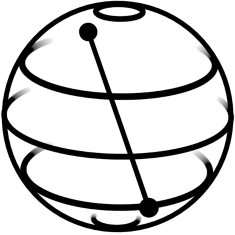
_Quantum Information Software Kit_

In [1]:
import qiskit as q


In [2]:
# %pip install array_to_latex
from array_to_latex import to_ltx
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
def printarray(array,preface=""):
    printmd("$"+preface+to_ltx(array, frmt = '{:6.2f}', arraytype = 'pmatrix',print_out= False)+"$")

- _Terra_: Herramientas para la construcción de circuitos cuánticos. Desde la interfaz de alto nivel hasta protocolos de pulsos.
- _Aqua_: Algoritmos con enfoque a aplicaciones. (química, finanzas,machine learning, optimización)
- _Ignis_(deprecated): Herramientas para benchmarking, caracterización y corrección de errores.
- _Aer_: Simuladores y emuladores.

_QASM_: Representación intermedia de las instrucciones de algoritmos cuánticos.

## Workflow

1. __Build__
2. __Compile__
3. __Run__
4. __Analyze__

## Circuitos Cuánticos
Representados por la clase `qiskit.QuantumCircuit`. Podemos especificar registros cuánticos o clásicos asociados al circuito o sólo indicar el número de quibits que utiliza.

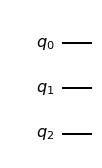

In [71]:
qc = q.QuantumCircuit(3)
qc.draw("mpl")


In [4]:
qr = q.QuantumRegister(5)
cr = q.ClassicalRegister(3)
qc2 = q.QuantumCircuit(qr,cr)

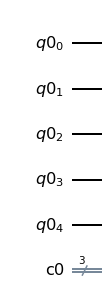

In [5]:
qc2.draw("mpl")

In [6]:
qra = q.QuantumRegister(5,"alice")
qrb = q.QuantumRegister(5,"bob")
cr = q.ClassicalRegister(3,"my_measurements")
qc3 = q.QuantumCircuit(qra,qrb,cr)

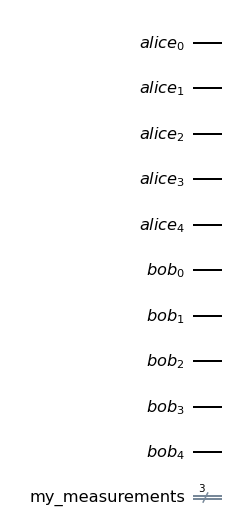

In [7]:
qc3.draw("mpl")

## Inicializando el estado de los qubits

De forma predeterminada el estado  inicial es $\left| 0\right>^{\otimes n}$ pero es posible especificar otro de varias formas.

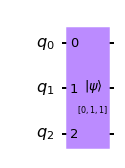

In [8]:
qc = q.QuantumCircuit(3)
qc.initialize("011")
qc.draw("mpl")

In [9]:
import numpy as np

aux = np.arange(0,8)
state = np.exp((0+1j)*aux)/np.sqrt(8)

In [10]:
printarray(state)

$\begin{pmatrix}
    0.35 +   0.00j &    0.19 +   0.30j &  -0.15 +   0.32j &  -0.35 +   0.05j &  -0.23 +  -0.27j &    0.10 +  -0.34j &    0.34 +  -0.10j &    0.27 +   0.23j
\end{pmatrix}$

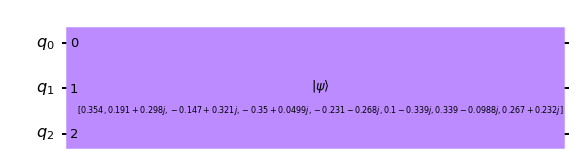

In [11]:
qc = q.QuantumCircuit(3)
qc.initialize(state)
qc.draw("mpl")

## Primeras Compuertas

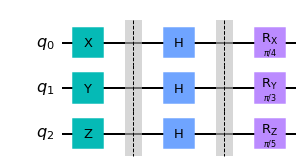

In [12]:
qc = q.QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(2)

qc.barrier()

qc.h([0,1,2])

qc.barrier()

qc.rx(np.pi/4,0)
qc.ry(np.pi/3,1)
qc.rz(np.pi/5,2)
qc.draw("mpl")

In [13]:
for s in qc.data:
    print(s)

(Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 0)], [])
(Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 1)], [])
(Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 2)], [])
(Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)], [])
(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 0)], [])
(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 1)], [])
(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 2)], [])
(Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), [Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)], [])
(Instruction(nam

In [14]:
qc.count_ops()

OrderedDict([('h', 3),
             ('barrier', 2),
             ('x', 1),
             ('y', 1),
             ('z', 1),
             ('rx', 1),
             ('ry', 1),
             ('rz', 1)])

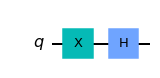

In [15]:
from qiskit import BasicAer
unisim = BasicAer.get_backend('unitary_simulator')

# construimos un circuito con una
# compuerta X y una H
simple = q.QuantumCircuit(1)
simple.x(0)
simple.h(0)
simple.draw("mpl")



In [16]:
job = unisim.run(q.transpile(simple, unisim))
circuit_matrix = job.result().get_unitary(simple, decimals=4)
printarray(circuit_matrix)

$\begin{pmatrix}
    0.71 +   0.00j &    0.71 +   0.00j\\
  -0.71 +  -0.00j &    0.71 +   0.00j
\end{pmatrix}$

In [17]:
xmat = np.array([[0,1],[1,0]])
hmat = np.array([[1,1],[1,-1]])/np.sqrt(2)
printarray(xmat,"X=")
printarray(hmat,"H=")
printarray(hmat@xmat,"HX=")

$X=\begin{pmatrix}
    0.00 &    1.00\\
    1.00 &    0.00
\end{pmatrix}$

$H=\begin{pmatrix}
    0.71 &    0.71\\
    0.71 &  -0.71
\end{pmatrix}$

$HX=\begin{pmatrix}
    0.71 &    0.71\\
  -0.71 &    0.71
\end{pmatrix}$

# Simulaciones
`qiskit.Aer` provee varios backends (motores de simulación).

In [18]:
q.Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [19]:
simulator = q.Aer.get_backend('aer_simulator')

A diferencia del backend previo el objetivo de este simulador es reporducir la ejecución del circuito en un dispositivo. La salida es un diccionario con el número de cuentas que se midió cada estado clásico.

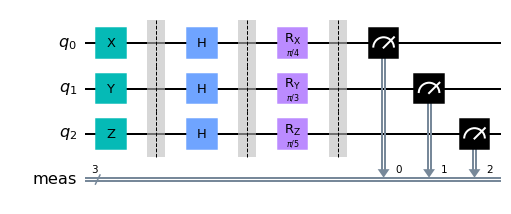

In [20]:
qc2 = qc.copy()
qc2.measure_all()
qc2.draw("mpl")

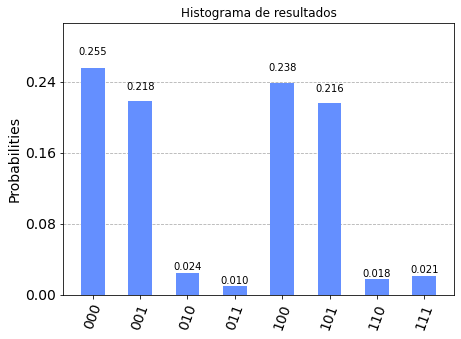

In [21]:
from qiskit.tools.visualization import plot_histogram

qctrans = q.transpile(qc2,simulator)
result = simulator.run(qctrans).result()
counts = result.get_counts(qctrans)
plot_histogram(counts, title='Histograma de resultados')

In [22]:
counts

{'000': 261,
 '001': 223,
 '100': 244,
 '101': 221,
 '010': 25,
 '011': 10,
 '111': 22,
 '110': 18}

In [23]:
qc3 = qc.copy()
statesim = q.Aer.get_backend('statevector_simulator')
out = q.execute(qc3,statesim).result().get_statevector()
out

Statevector([-0.03789283+0.4814741j ,  0.03789283-0.4814741j ,
              0.01015335-0.1290106j , -0.01015335+0.1290106j ,
             -0.31365932+0.36724788j,  0.31365932-0.36724788j,
              0.08404476-0.09840377j, -0.08404476+0.09840377j],
            dims=(2, 2, 2))


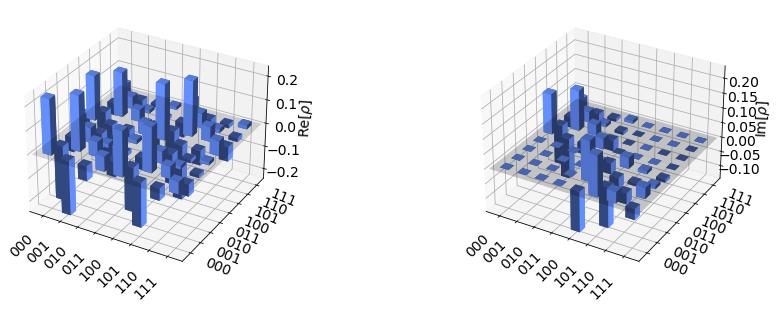

In [24]:
q.visualization.plot_state_city(out)

## Esfera de Bloch

$$\left| \psi \right> =a \left| 0 \right> +b \left|1 \right> =g(\cos(\theta/2) \left| 0 \right> + e^{i\phi}\sin(\theta/2) \left|1 \right>)$$

$$\phi_0 = \arg(a) \qquad \phi_1 = \arg(b) \qquad \phi = \phi_0 - \phi_1$$
$$ \theta = 2\arccos(|a|)$$
https://javafxpert.github.io/grok-bloch/

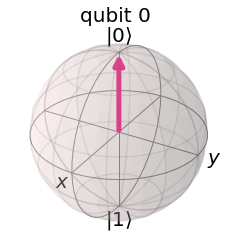

In [25]:
# Estado |0>
q.visualization.plot_bloch_multivector([1,0])

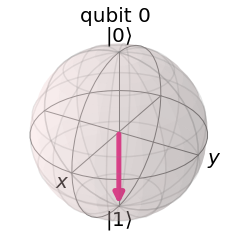

In [26]:
# Estado |1>
q.visualization.plot_bloch_multivector([0,1])

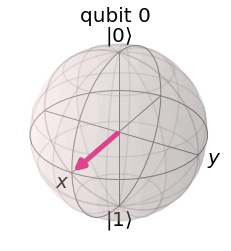

In [27]:
# Estado |+>
q.visualization.plot_bloch_multivector([0.707,0.707])

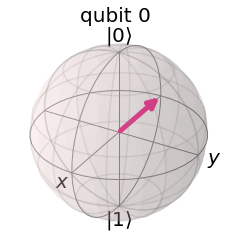

In [28]:
# Estado |->
q.visualization.plot_bloch_multivector([0.707,-0.707])

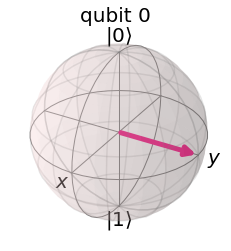

In [29]:
# Estado |y+>
q.visualization.plot_bloch_multivector([0.707,0+0.707j])

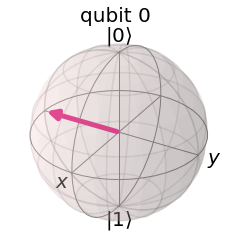

In [30]:
# Estado |y+>
q.visualization.plot_bloch_multivector([0.707,0-0.707j])

# Ejemplo: Casi Hadamard

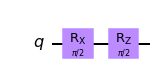

In [31]:
ex1 = q.QuantumCircuit(1)
ex1.rx(np.pi/2,0)
ex1.rz(np.pi/2,0)
ex1.draw("mpl")

In [32]:
out = q.execute(ex1,statesim).result().get_statevector()
out

Statevector([0.5-0.5j, 0.5-0.5j],
            dims=(2,))


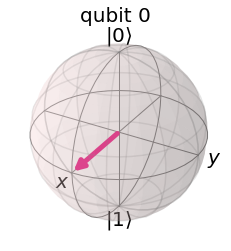

In [33]:
# Esperamos |+>
q.visualization.plot_bloch_multivector(out)
# HAY UNA FASE GLOBAL!!!

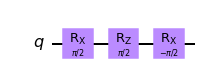

In [34]:
ex1 = q.QuantumCircuit(1)
ex1.rx(np.pi/2,0)
ex1.rz(np.pi/2,0)
ex1.rx(-np.pi/2,0)
ex1.draw("mpl")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


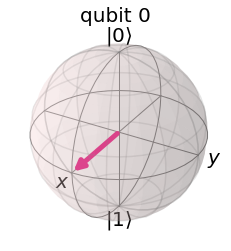

In [35]:
out = q.execute(ex1,statesim).result().get_statevector()
print(out)
q.visualization.plot_bloch_multivector(out)

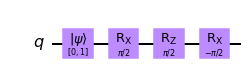

In [36]:
ex1b = q.QuantumCircuit(1)
ex1b.initialize([0,1])
#ex1b = ex1b + ex1
ex1b = ex1b.compose(ex1)
ex1b.draw("mpl")

Statevector([-0.70710678+0.j,  0.70710678+0.j],
            dims=(2,))


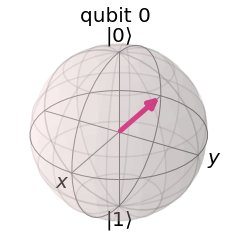

In [37]:
out = q.execute(ex1b,statesim).result().get_statevector()
print(out)
q.visualization.plot_bloch_multivector(out)

In [40]:

rxmat = q.circuit.library.RXGate(np.pi/2).to_matrix()
printarray(rxmat,"R_{X \pi/2} = ")

rzmat = q.circuit.library.RZGate(np.pi/2).to_matrix()
printarray(rzmat,"R_{Z \pi/2} = ")

rxmatinv = q.circuit.library.RXGate(-np.pi/2).to_matrix()
printarray(rxmatinv,"R_{X -\pi/2} = ")

$R_{X \pi/2} = \begin{pmatrix}
    0.71 +   0.00j &    0.00 +  -0.71j\\
    0.00 +  -0.71j &    0.71 +   0.00j
\end{pmatrix}$

$R_{Z \pi/2} = \begin{pmatrix}
    0.71 +  -0.71j &    0.00 +   0.00j\\
    0.00 +   0.00j &    0.71 +   0.71j
\end{pmatrix}$

$R_{X -\pi/2} = \begin{pmatrix}
    0.71 +   0.00j &    0.00 +   0.71j\\
    0.00 +   0.71j &    0.71 +   0.00j
\end{pmatrix}$

In [41]:
printarray(rxmatinv@rzmat@rxmat)

$\begin{pmatrix}
    0.71 +   0.00j &  -0.71 +   0.00j\\
    0.71 +   0.00j &    0.71 +   0.00j
\end{pmatrix}$

In [42]:
from qiskit.quantum_info import Operator
U = Operator(ex1)
U

Operator([[ 0.70710678+0.j, -0.70710678+0.j],
          [ 0.70710678+0.j,  0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))

In [43]:
# Estado |+> al pasar por el circuito
pstate = np.array([1,1])/np.sqrt(2)
U@pstate

array([0.+0.j, 1.+0.j])

In [44]:
mstate = np.array([1,-1])/np.sqrt(2)
U@mstate

array([1.+0.j, 0.+0.j])

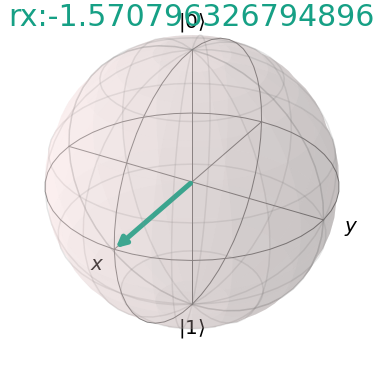

In [72]:
q.visualization.visualize_transition(ex1)
print(" ")

### Addendum


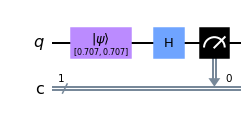

In [73]:
otherbase = q.QuantumCircuit(1,1)
otherbase.initialize([np.sqrt(1/2),np.sqrt(1/2)])
otherbase.h(0)
otherbase.measure(0,0)
otherbase.draw("mpl")

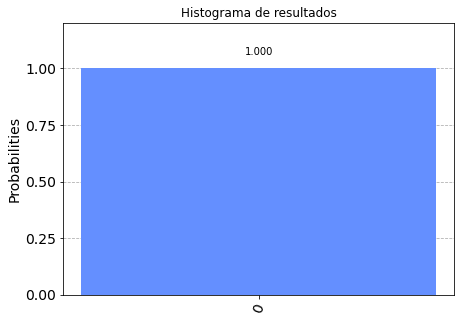

In [74]:
othertrans = q.transpile(otherbase,simulator)
result = simulator.run(othertrans).result()
counts = result.get_counts(othertrans)
plot_histogram(counts, title='Histograma de resultados')

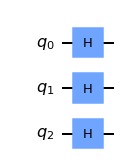

In [46]:
ah = q.QuantumCircuit(3)
ah.h([0,1,2])
ah.draw("mpl")

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


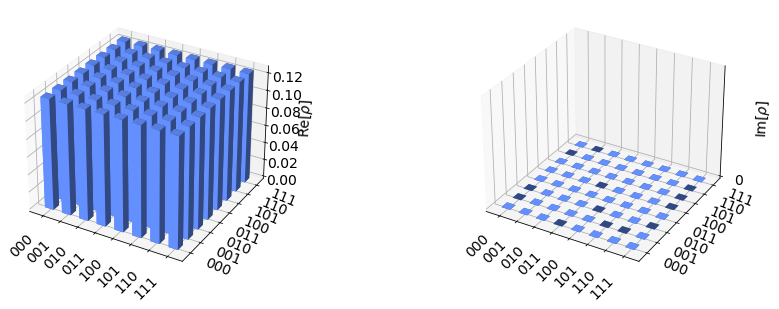

In [47]:
out = q.execute(ah,statesim).result().get_statevector()
print(out)
q.visualization.plot_state_city(out)

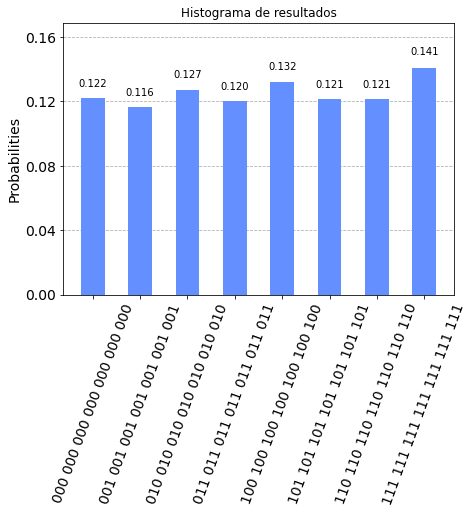

In [69]:
ah.measure_all()
qctrans = q.transpile(ah,simulator)
result = simulator.run(qctrans).result()
counts = result.get_counts(qctrans)
plot_histogram(counts, title='Histograma de resultados')


$\mu$Sesión de preguntas
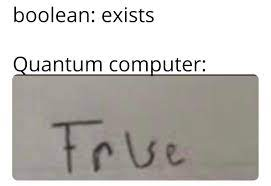